<module 'tensorflow_core._api.v2.version' from '/opt/anaconda3/envs/tensorflow-2/lib/python3.7/site-packages/tensorflow_core/_api/v2/version/__init__.py'>
sys.version_info(major=3, minor=7, micro=5, releaselevel='final', serial=0)
matplotlib 3.1.1
numpy 1.17.3
pandas 0.25.2
sklearn 0.21.3
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf
(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)
784


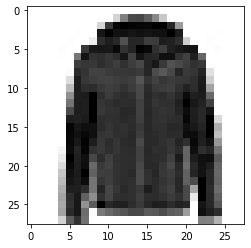

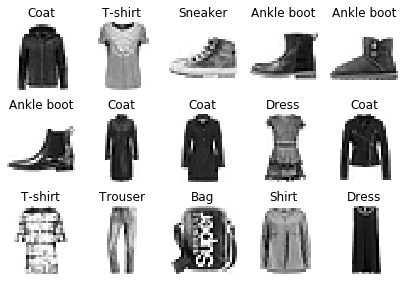

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 8s 150us/sample - loss: 2.2383 - accuracy: 0.6997 - val_loss: 0.6283 - val_accuracy: 0.7802
Epoch 2/10
55000/55000 [==============================] - 7s 130us/sample - loss: 0.5834 - accuracy: 0.7907 - val_loss: 0.5595 - val_accuracy: 0.8052
Epoch 3/10
55000/55000 [==============================] - 7s 136us/sample - loss: 0.5080 - accuracy: 0.8169 - val_loss: 0.4943 - val_accuracy: 0.8308
Epoch 4/10
55000/55000 [==============================] - 7s 134us/sample - loss: 0.4633 - accuracy: 0.8330 - val_loss: 0.4798 - val_accuracy: 0.8362
Epoch 5/10
55000/55000 [==============================] - 8s 144us/sample - loss: 0.4351 - accuracy: 0.8416 - val_loss: 0.4719 - val_accuracy: 0.8374
Epoch 6/10
55000/55000 [==============================] - 8s 151us/sample - loss: 0.4111 - accuracy: 0.8496 - val_loss: 0.4720 - val_accuracy: 0.8406
Epoch 7/10
55000/55000 [===========================

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.version)
print(sys.version_info)

for module in mpl, np, pd, sklearn, tf, keras:
  print(module.__name__, module.__version__)

fashion_minst = keras.datasets.fashion_mnist

(x_train_all, y_train_all), (x_test, y_test) = fashion_minst.load_data()

x_valid, x_train = x_train_all = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

print('===============================')
print(x_train[0].size)
print('===============================')

def show_single_image(img_arr):
  plt.imshow(img_arr, cmap="binary")
  plt.show()

def show_images(n_rows, n_cols, x_data, y_data, class_names):
  assert len(x_data) == len(y_data)
  assert n_rows * n_cols < len(x_data)
  plt.figure(figsize = (n_cols * 1.4, n_rows * 1.6))
  for row in range(n_rows):
    for col in range(n_cols):
      index = n_cols * row + col
      plt.subplot(n_rows, n_cols, index + 1)
      plt.imshow(x_data[index], cmap="binary", interpolation = 'nearest')
      plt.axis('off')
      plt.title(class_names[y_data[index]])
  plt.show()

class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker',
               'Bag', 'Ankle boot']

# show single or multiple images
show_single_image(x_train[0])
show_images(3, 5, x_train, y_train, class_names)

# sequential
# 全连接层和激活函数
# relu, y = max(0, x)
# softmax, 将向量变成概率分布 x = [x1, x2, x3], y = [e^x1 / sum, e^x2 / sum, e^x3 / sum], sum = e^x1 + e^x2 + e^x3
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape = [28, 28]),
  keras.layers.Dense(300, activation="relu"),
  keras.layers.Dense(100, activation="relu"),
  keras.layers.Dense(10, activation="softmax")
])


model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.SGD(0.001),
              metrics = ["accuracy"])

# 查看模型层数和概况
# print(model.layers)
# print(model.summary())

history = model.fit(x_train, y_train, epochs=10, validation_data = (x_valid, y_valid))


In [2]:
type(history)

tensorflow.python.keras.callbacks.History

In [3]:
history.history

{'loss': [2.238256806312908,
  0.5834044685623863,
  0.5079769005797126,
  0.463250979978388,
  0.43510553398132323,
  0.4111146838318218,
  0.3931259499246424,
  0.3809424799832431,
  0.36803704440810464,
  0.35732693533680654],
 'accuracy': [0.6996727,
  0.7907091,
  0.81694543,
  0.8329818,
  0.8415818,
  0.8496182,
  0.856,
  0.8591818,
  0.8643091,
  0.86767274],
 'val_loss': [0.62833379073143,
  0.5595263612031937,
  0.4942660018444061,
  0.47979750628471374,
  0.47192168889045716,
  0.4719762897968292,
  0.44529177899360656,
  0.4331734377026558,
  0.42902528642416,
  0.42277191982269285],
 'val_accuracy': [0.7802,
  0.8052,
  0.8308,
  0.8362,
  0.8374,
  0.8406,
  0.8468,
  0.8544,
  0.8582,
  0.8582]}

In [4]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

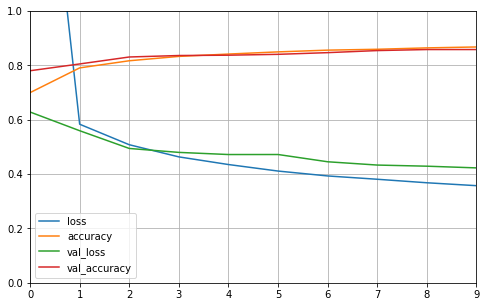

In [5]:
plot_learning_curves(history)